In [8]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
import matplotlib.pyplot as plt

In [9]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [46]:
class vae(nn.Module):
    def __init__(self):
        super(vae,self).__init__()
        
        self.encoder= nn.Sequential(
                      nn.Conv2d(3,64,4,padding=1,stride=2),
                    nn.BatchNorm2d(64),
                    nn.LeakyReLU(),
                    nn.Conv2d(64,64,4,padding=1,stride=2),
                    nn.BatchNorm2d(64),
                    nn.LeakyReLU(),
                    nn.Conv2d(64,64,4,padding=1,stride=2),
                    nn.BatchNorm2d(64),
                    nn.LeakyReLU(),
                    nn.Conv2d(64,64,4,padding=1,stride=2),
                    nn.BatchNorm2d(64),
                    nn.LeakyReLU()
        )
        self.mu= nn.Linear(64*8*8,200)
        self.log_var= nn.Linear(64*8*8,200)
        self.n       = torch.distributions.Normal(0,1)
        self.n.loc   = self.n.loc.cuda()
        self.n.scale = self.n.scale.cuda()
        
        self.decoder = nn.Sequential(
                       nn.Linear(200,64*8*8),
                       nn.Unflatten(1,(64,8,8)),
                       nn.ConvTranspose2d(64,64,4,padding=1,stride=2),
                       nn.BatchNorm2d(64),
                       nn.LeakyReLU(),
                       nn.ConvTranspose2d(64,64,4,padding=1,stride=2),
                       nn.BatchNorm2d(64),
                       nn.LeakyReLU(),
                       nn.ConvTranspose2d(64,64,4,padding=1,stride=2),
                       nn.BatchNorm2d(64),
                       nn.LeakyReLU(),
                       nn.ConvTranspose2d(64,3,4,padding=1,stride=2),
                       nn.Sigmoid()
        )
    
    def forward(self,x):
        x= self.encoder(x)
        #print(x.shape)
        mu= self.mu(torch.flatten(x,1))
        log_var= self.log_var(torch.flatten(x,1))
        sigma= torch.exp(log_var/2)
        z= mu+sigma*self.n.sample(mu.shape)
        #print(encoded.shape)
        decoded= self.decoder(z)
        #print(decoded.shape)
        return decoded

In [47]:
transform = transforms.Compose(
    [transforms.Resize((128,128)),
    transforms.ToTensor(),
     transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])

batch_size = 32

trainset = torchvision.datasets.CelebA(root='./data', split='train',
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=1)
testset = torchvision.datasets.CelebA(root='./data', train=False,
                                        #download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                          #shuffle=True, num_workers=1)

Files already downloaded and verified


In [48]:
trainset

Dataset CelebA
    Number of datapoints: 162770
    Root location: ./data
    Target type: ['attr']
    Split: train
    StandardTransform
Transform: Compose(
               Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

In [49]:
trainset[0]

(tensor([[[ 0.9843,  0.9843,  0.9843,  ...,  0.9843,  0.9608,  0.9922],
          [ 0.9843,  0.9843,  0.9843,  ...,  0.9922,  0.9765,  1.0000],
          [ 0.9843,  0.9843,  0.9843,  ...,  0.9608,  0.9843,  0.9922],
          ...,
          [ 0.3961,  0.3098,  0.1294,  ..., -0.2078, -0.2314, -0.2471],
          [ 0.0902,  0.0667,  0.2235,  ..., -0.0745, -0.0824, -0.0902],
          [ 0.2471,  0.5137,  0.7098,  ..., -0.0745, -0.0667, -0.0667]],
 
         [[ 0.8118,  0.8118,  0.8118,  ...,  0.8431,  0.8196,  0.8667],
          [ 0.8118,  0.8118,  0.8118,  ...,  0.8510,  0.8431,  0.8745],
          [ 0.8118,  0.8118,  0.8118,  ...,  0.8275,  0.8510,  0.8667],
          ...,
          [-0.1216, -0.2078, -0.4039,  ..., -0.7098, -0.7333, -0.7412],
          [-0.4353, -0.4588, -0.3176,  ..., -0.6078, -0.6078, -0.6078],
          [-0.2863, -0.0196,  0.1608,  ..., -0.6157, -0.6078, -0.6000]],
 
         [[ 0.5216,  0.5216,  0.5216,  ...,  0.6863,  0.7569,  0.7412],
          [ 0.5216,  0.5216,

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


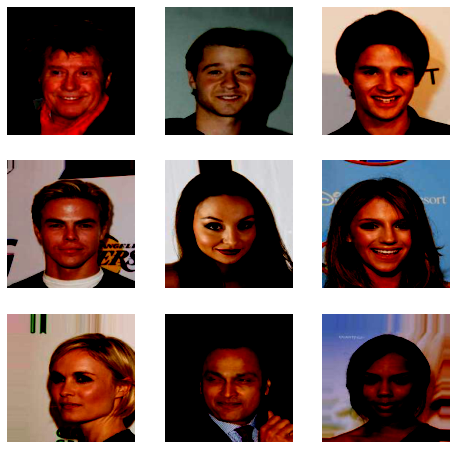

In [50]:
import numpy as np
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(trainset), size=(1,)).item()
    img, label = trainset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.axis("off")
    plt.imshow(img.permute(1,2,0))
plt.show()

In [51]:
model=vae().to(device)

In [52]:
optimizer= optim.Adam(model.parameters(),lr=1e-5)
criterion= nn.MSELoss()

In [53]:
for epoch in range(200):
    size = len(trainloader.dataset)
    for batch,(x,Y) in enumerate(trainloader):
        x_train,y_train= x.to(device),x.to(device)
        y_pred= model(x_train)
        loss= criterion(y_pred,y_train)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if batch % 1000==0:
            loss, current = loss.item(), batch * len(x_train)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]",f"epoch: {epoch}")

loss: 0.807813  [    0/162770] epoch: 0
loss: 0.406914  [32000/162770] epoch: 0
loss: 0.311698  [64000/162770] epoch: 0
loss: 0.350497  [96000/162770] epoch: 0
loss: 0.298427  [128000/162770] epoch: 0
loss: 0.257840  [160000/162770] epoch: 0
loss: 0.255290  [    0/162770] epoch: 1
loss: 0.253064  [32000/162770] epoch: 1
loss: 0.287713  [64000/162770] epoch: 1
loss: 0.287214  [96000/162770] epoch: 1
loss: 0.227049  [128000/162770] epoch: 1
loss: 0.209509  [160000/162770] epoch: 1
loss: 0.247701  [    0/162770] epoch: 2
loss: 0.251161  [32000/162770] epoch: 2
loss: 0.265091  [64000/162770] epoch: 2
loss: 0.268027  [96000/162770] epoch: 2
loss: 0.248309  [128000/162770] epoch: 2
loss: 0.301915  [160000/162770] epoch: 2
loss: 0.214028  [    0/162770] epoch: 3
loss: 0.275861  [32000/162770] epoch: 3
loss: 0.276659  [64000/162770] epoch: 3
loss: 0.255417  [96000/162770] epoch: 3
loss: 0.201286  [128000/162770] epoch: 3
loss: 0.215029  [160000/162770] epoch: 3
loss: 0.240762  [    0/162770] e

KeyboardInterrupt: 

In [54]:
torch.save(model.state_dict(), "variationalautoencoder_face.pt")

In [57]:
testset = torchvision.datasets.CelebA(root='./data', split='test',
                                        download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                          shuffle=True, num_workers=1)

Files already downloaded and verified


TypeError: Invalid shape (32, 3, 128, 128) for image data

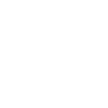

In [74]:
import numpy as np
figure = plt.figure(figsize=(8, 8))
cols, rows = 4, 4
for i in range(1, cols * rows + 1):
    for batch,(x,Y) in enumerate(testloader):
        x_train,y_train= x.to(device),x.to(device)
        with torch.no_grad():
            image= model(x_train)
            image
        figure.add_subplot(rows, cols, i)
        plt.axis("off")
        plt.imshow(image.cpu().squeeze())
plt.show()

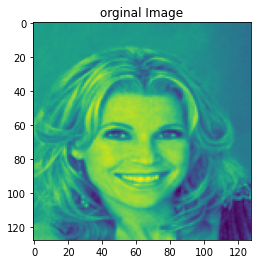

In [72]:
for batch,(x,Y) in enumerate(testloader):
    item = x.reshape(-1, 128, 128)
    reconstructed= model(x.to(device))
    generate= reconstructed.cpu()
    plt.imshow(item[0])
    plt.title("orginal Image")

Text(0.5, 1.0, 'generated image')

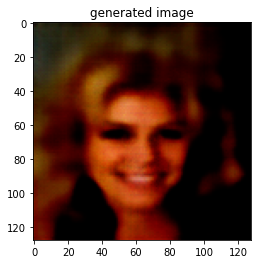

In [73]:
plt.imshow(generate.data[0].squeeze().permute(1,2,0))
plt.title('generated image')

In [76]:
i= next(iter(testloader))

In [81]:
image,label=i

In [84]:
image.shape

torch.Size([32, 3, 128, 128])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


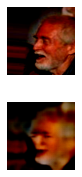

In [103]:
import numpy
n_show=1
ex_batch= next(iter(testloader))
ex_images= ex_batch[0]

gen_images= model(ex_images.to(device))
gen_images= gen_images.cpu().detach()

fig = plt.figure(figsize=(2, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(n_show):
    img = ex_images[i].squeeze()
    sub = fig.add_subplot(2, n_show, i+1)
    sub.axis('off')        
    sub.imshow(img.permute(1,2,0))

for i in range(n_show):
    img = gen_images[i].squeeze()
    sub = fig.add_subplot(2, n_show, i+n_show+1)
    sub.axis('off')
    sub.imshow(img.permute(1,2,0))
